Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../data/ping_pong/'

NMSG = 1_500_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}10/ping_pong_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 16 20:17:05 2025 +0100) (508.60ms ela...,17.000,0.0502,1.230,18.59,2.16,98.87,60.84 C,Nominal
1,(Sun Mar 16 20:17:05 2025 +0100) (505.59ms ela...,35.200,0.1310,0.849,38.86,3.79,97.53,63.21 C,Nominal
2,(Sun Mar 16 20:17:06 2025 +0100) (505.68ms ela...,32.700,0.1430,0.838,36.46,3.51,97.22,63.21 C,Nominal
3,(Sun Mar 16 20:17:06 2025 +0100) (507.77ms ela...,7.590,0.0495,0.835,8.58,1.03,55.80,63.49 C,Nominal
4,(Sun Mar 16 20:17:07 2025 +0100) (508.65ms ela...,0.631,0.0000,0.365,1.01,0.44,26.93,63.49 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(34339, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 16 20:17:16 2025 +0100) (1010.29ms el...,36.6,0.0651,1.160,39.20,3.88,98.90,64.12 C,Nominal
1,(Sun Mar 16 20:17:17 2025 +0100) (1003.98ms el...,32.4,0.0216,0.611,34.81,3.75,96.52,66.66 C,Nominal
2,(Sun Mar 16 20:17:18 2025 +0100) (1005.03ms el...,33.0,0.1890,0.624,35.57,3.78,97.52,68.65 C,Nominal
3,(Sun Mar 16 20:17:19 2025 +0100) (1004.72ms el...,34.9,0.1920,0.619,37.56,3.83,98.81,70.61 C,Nominal
4,(Sun Mar 16 20:17:20 2025 +0100) (1005.26ms el...,35.1,0.0202,0.538,37.21,3.83,98.45,72.55 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 20:07:46 2025 +0100) (508.56ms ela...,8.220,0.0958,0.972,9.13,1.06,55.17,47.41 C,Nominal
1,(Mon Mar 17 20:07:46 2025 +0100) (506.00ms ela...,6.770,0.1290,0.845,7.61,0.95,52.91,48.03 C,Nominal
2,(Mon Mar 17 20:07:47 2025 +0100) (507.11ms ela...,4.960,0.0739,0.966,5.87,1.13,50.82,48.03 C,Nominal
3,(Mon Mar 17 20:07:47 2025 +0100) (508.48ms ela...,0.566,0.0394,0.474,1.10,0.42,25.79,48.03 C,Nominal
4,(Mon Mar 17 20:07:48 2025 +0100) (508.24ms ela...,0.206,0.0000,0.280,0.44,0.12,8.85,48.03 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(18356, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Mar 17 20:07:58 2025 +0100) (1010.25ms el...,18.50,0.0964,1.040,20.02,1.93,94.68,49.49 C,Nominal
1,(Mon Mar 17 20:07:59 2025 +0100) (1005.77ms el...,8.77,0.0534,0.611,9.70,1.03,73.43,50.94 C,Nominal
2,(Mon Mar 17 20:08:00 2025 +0100) (1006.06ms el...,10.90,0.0307,0.611,11.68,1.31,78.92,50.89 C,Nominal
3,(Mon Mar 17 20:08:01 2025 +0100) (1007.20ms el...,7.73,0.0000,0.403,8.37,0.92,72.25,51.04 C,Nominal
4,(Mon Mar 17 20:08:02 2025 +0100) (1006.48ms el...,9.20,0.0000,0.445,9.89,0.91,69.54,50.96 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-16 20:17:05,17.000,0.0502,1.230,18.59,2.16,98.87,60.84,Nominal,508.60
1,2025-03-16 20:17:05,35.200,0.1310,0.849,38.86,3.79,97.53,63.21,Nominal,505.59
2,2025-03-16 20:17:06,32.700,0.1430,0.838,36.46,3.51,97.22,63.21,Nominal,505.68
3,2025-03-16 20:17:06,7.590,0.0495,0.835,8.58,1.03,55.80,63.49,Nominal,507.77
4,2025-03-16 20:17:07,0.631,0.0000,0.365,1.01,0.44,26.93,63.49,Nominal,508.65


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(34339, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-16 20:17:16,36.6,0.0651,1.160,39.20,3.88,98.90,64.12,Nominal,1010.29
1,2025-03-16 20:17:17,32.4,0.0216,0.611,34.81,3.75,96.52,66.66,Nominal,1003.98
2,2025-03-16 20:17:18,33.0,0.1890,0.624,35.57,3.78,97.52,68.65,Nominal,1005.03
3,2025-03-16 20:17:19,34.9,0.1920,0.619,37.56,3.83,98.81,70.61,Nominal,1004.72
4,2025-03-16 20:17:20,35.1,0.0202,0.538,37.21,3.83,98.45,72.55,Nominal,1005.26


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 20:07:46,8.220,0.0958,0.972,9.13,1.06,55.17,47.41,Nominal,508.56
1,2025-03-17 20:07:46,6.770,0.1290,0.845,7.61,0.95,52.91,48.03,Nominal,506.00
2,2025-03-17 20:07:47,4.960,0.0739,0.966,5.87,1.13,50.82,48.03,Nominal,507.11
3,2025-03-17 20:07:47,0.566,0.0394,0.474,1.10,0.42,25.79,48.03,Nominal,508.48
4,2025-03-17 20:07:48,0.206,0.0000,0.280,0.44,0.12,8.85,48.03,Nominal,508.24


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(18356, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-17 20:07:58,18.50,0.0964,1.040,20.02,1.93,94.68,49.49,Nominal,1010.25
1,2025-03-17 20:07:59,8.77,0.0534,0.611,9.70,1.03,73.43,50.94,Nominal,1005.77
2,2025-03-17 20:08:00,10.90,0.0307,0.611,11.68,1.31,78.92,50.89,Nominal,1006.06
3,2025-03-17 20:08:01,7.73,0.0000,0.403,8.37,0.92,72.25,51.04,Nominal,1007.20
4,2025-03-17 20:08:02,9.20,0.0000,0.445,9.89,0.91,69.54,50.96,Nominal,1006.48


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    
    # idle_df["Elapsed Time (s)"] = (idle_df["Timestamp"] - idle_df["Timestamp"].iloc[0]).dt.total_seconds()
    # bench_df["Elapsed Time (s)"] = (bench_df["Timestamp"] - bench_df["Timestamp"].iloc[0]).dt.total_seconds()

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


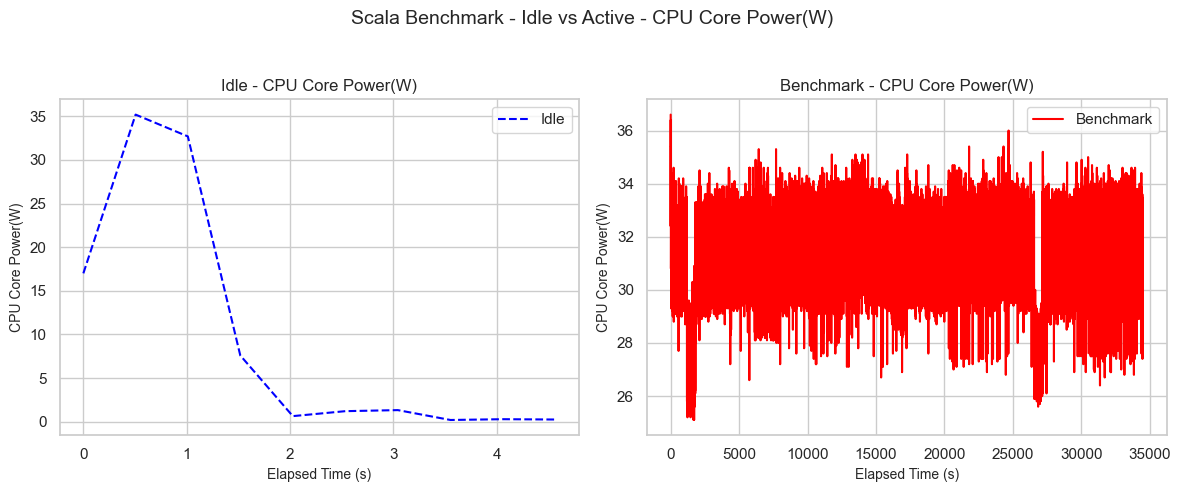

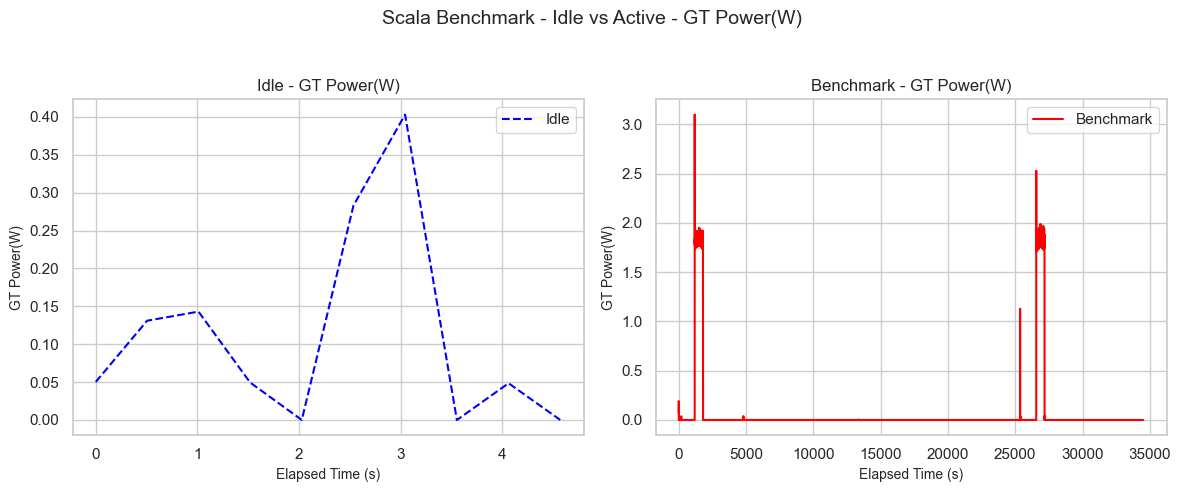

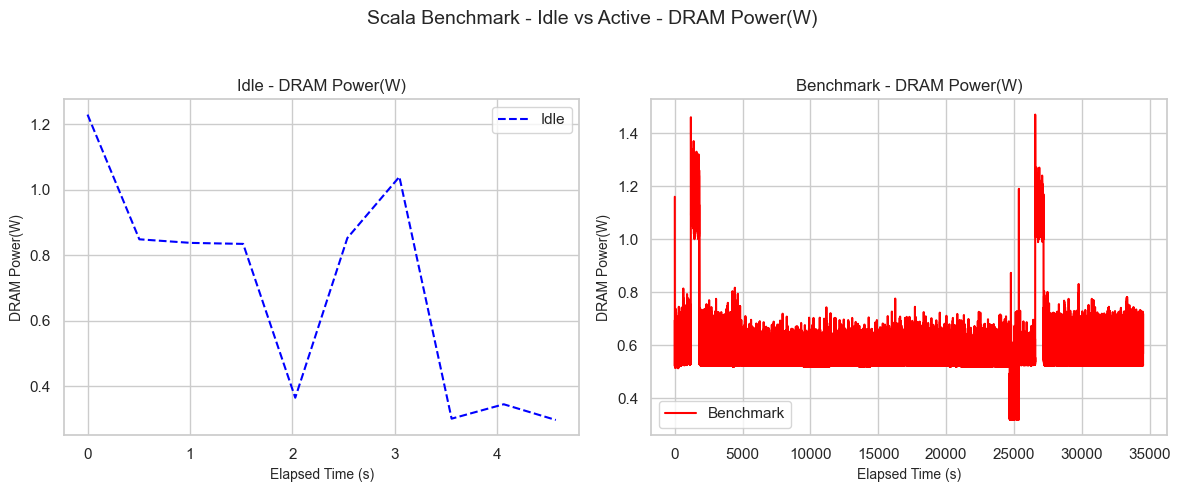

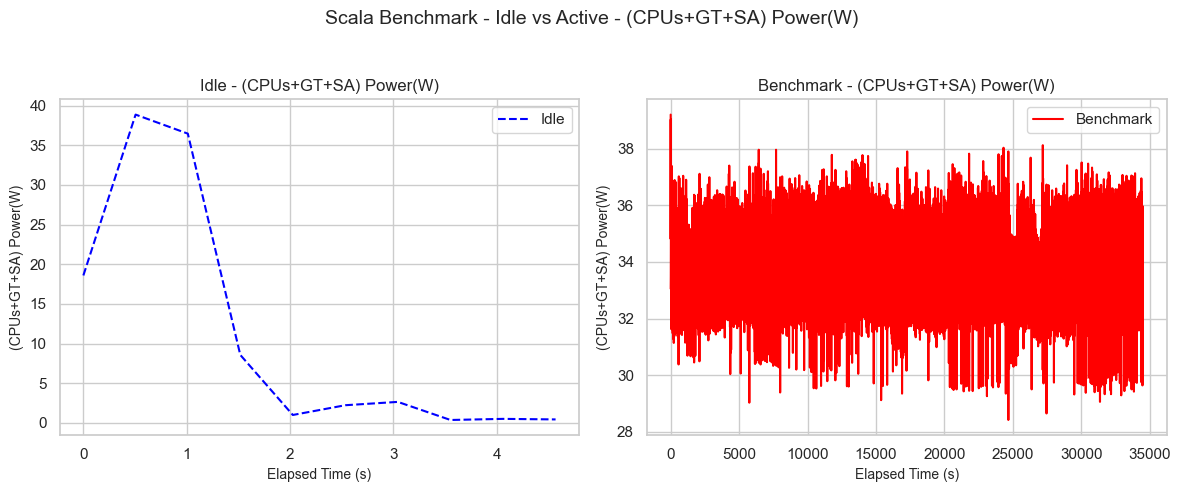

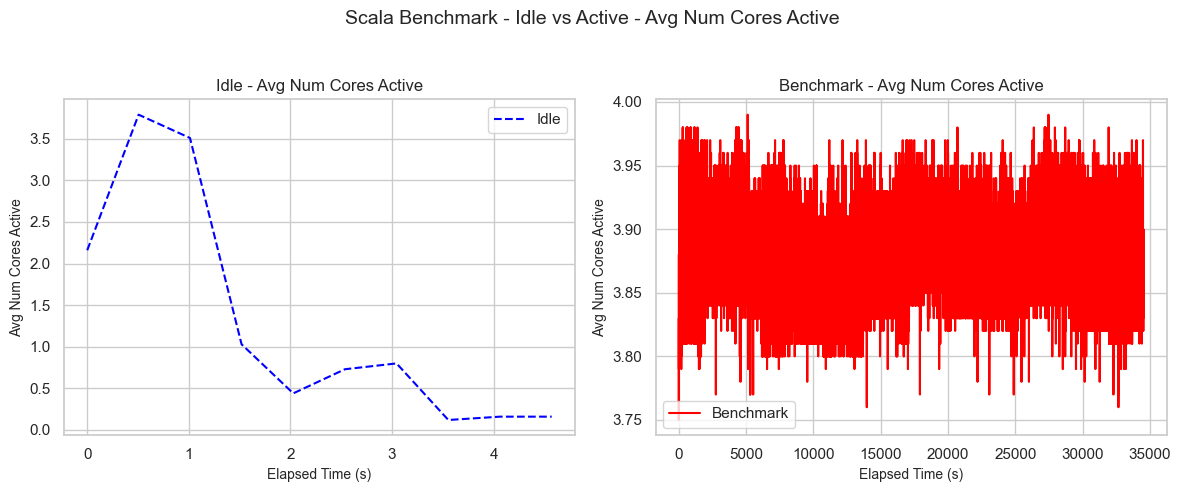

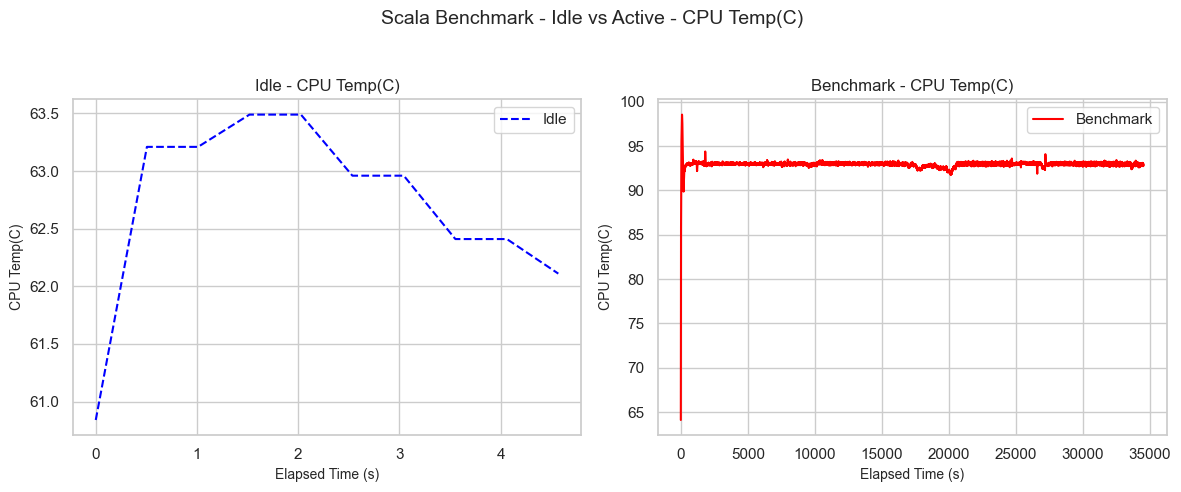

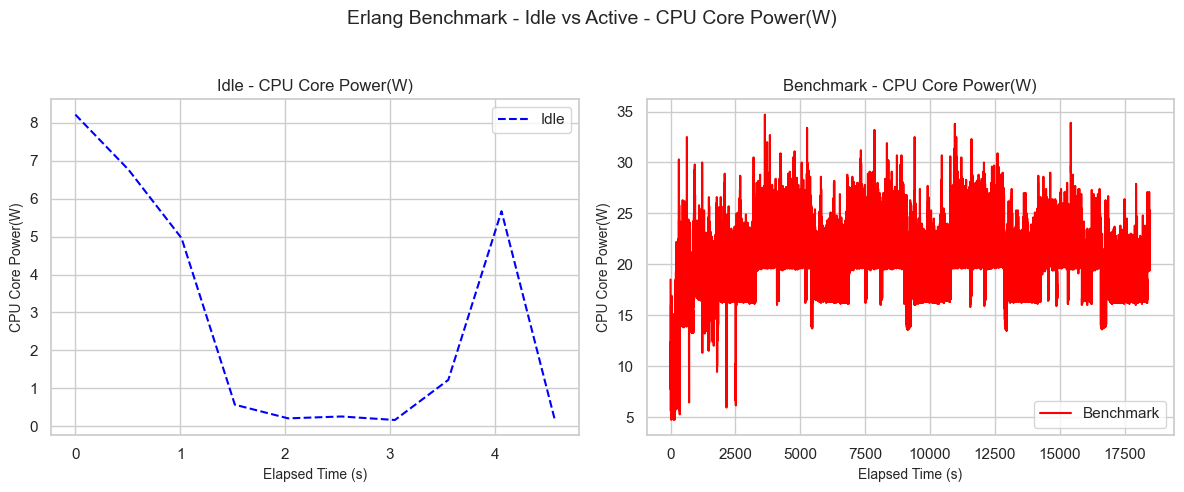

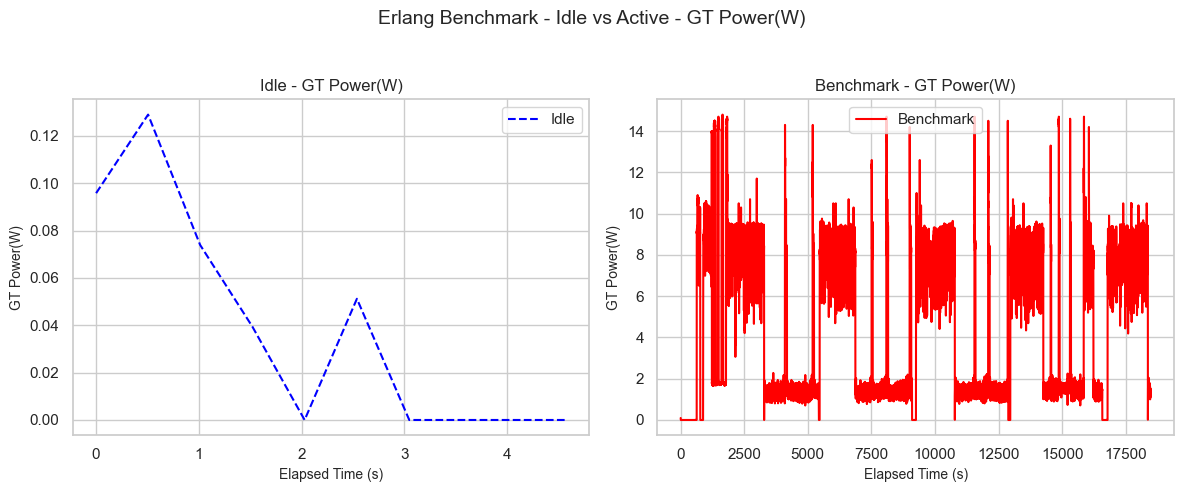

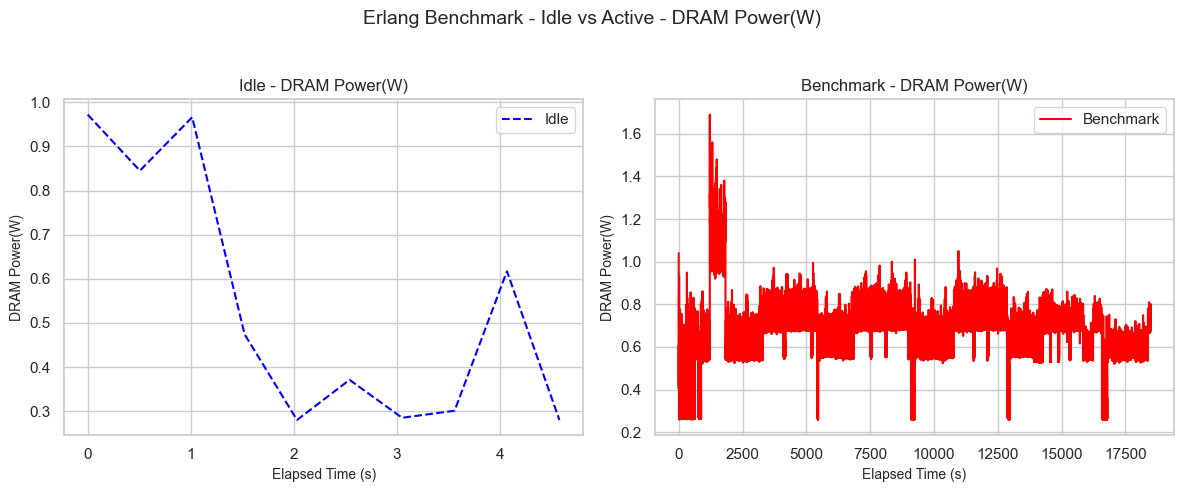

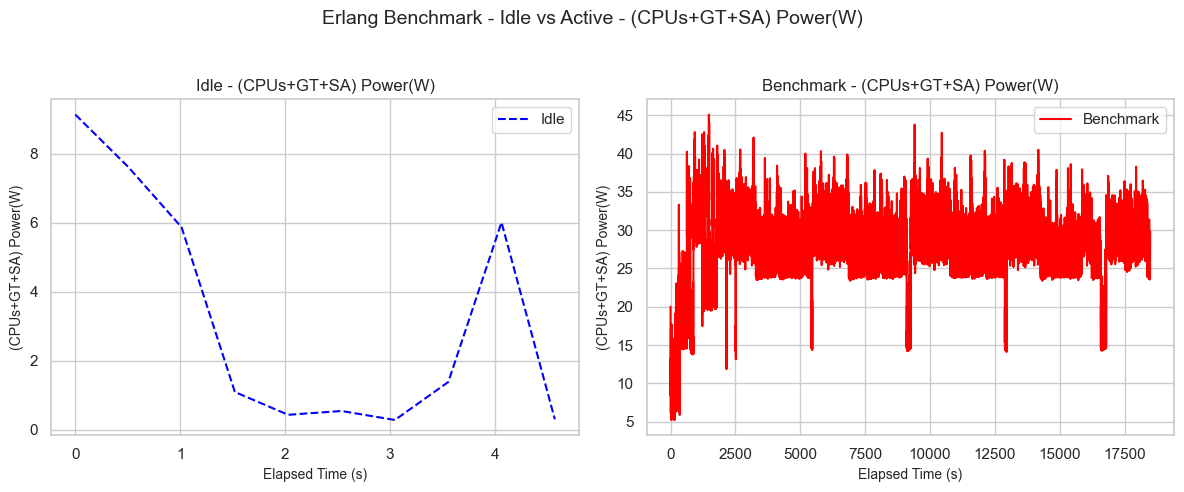

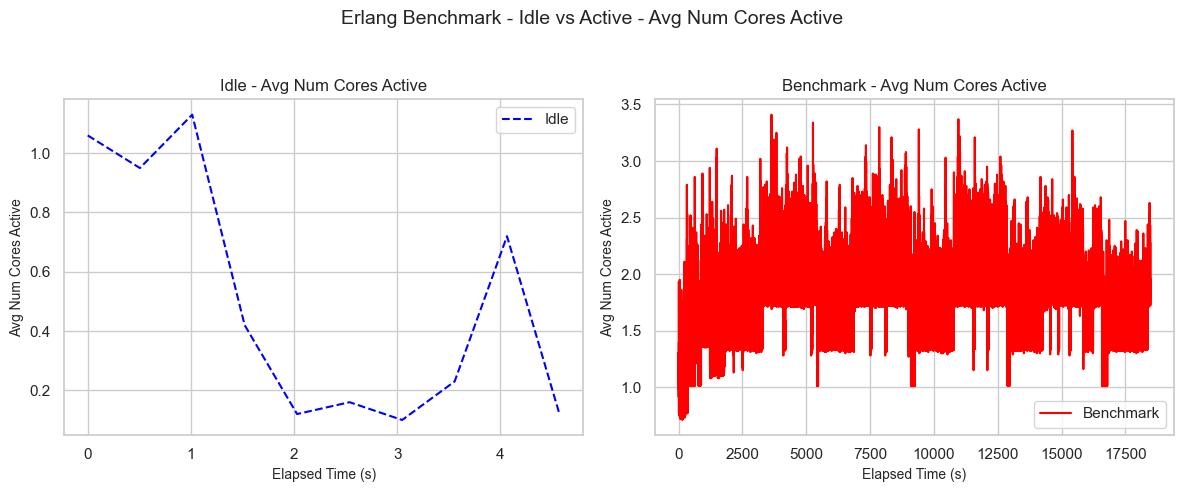

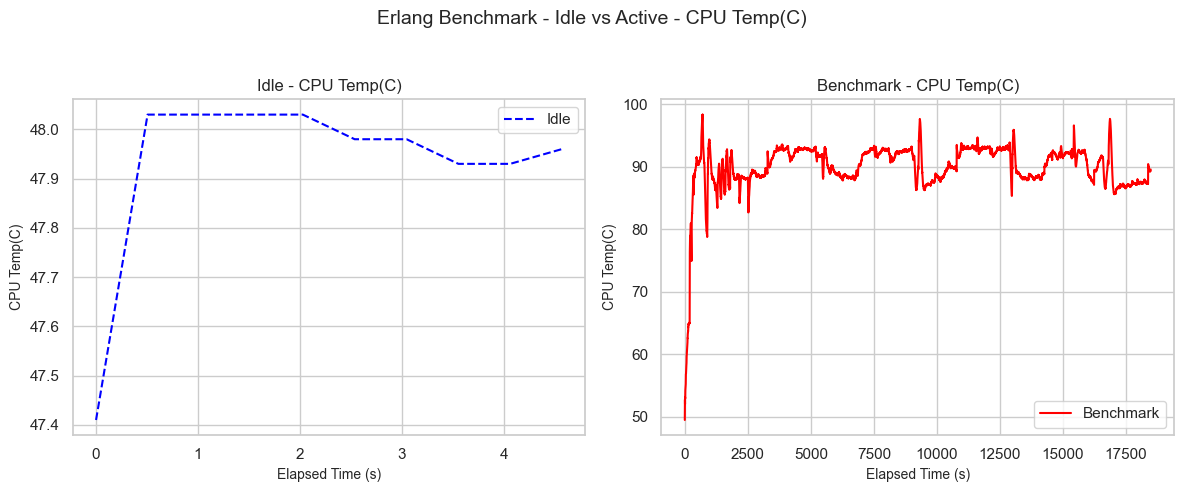

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [19]:
def format_message_count(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg / 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg / 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg / 1_000}K"
    return str(nmsg)

message_label = format_message_count(NMSG)
title_config_prefix = f"({message_label} Messages, {ITERATIONS} Iterations)"

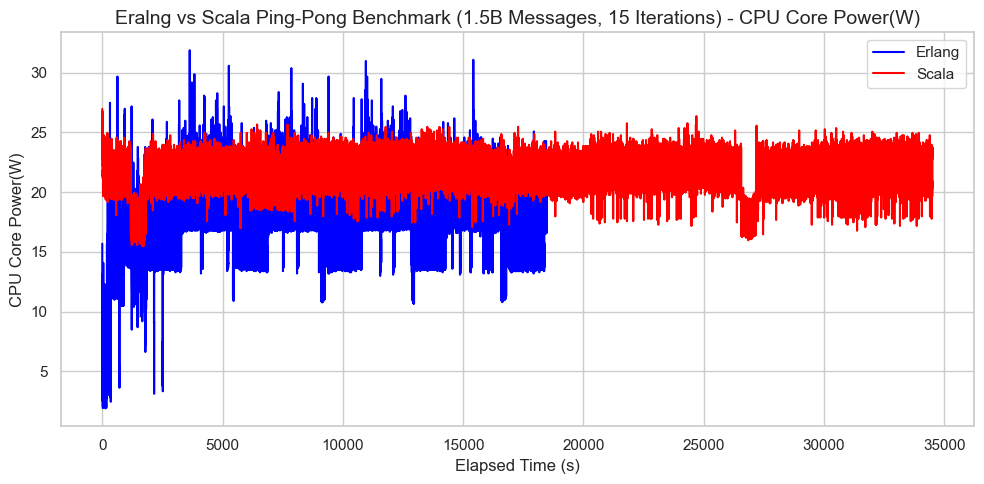

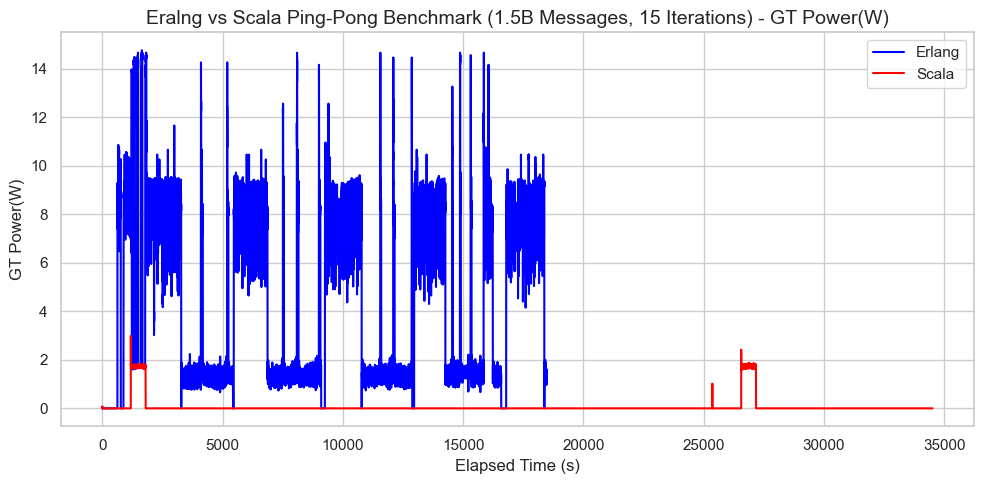

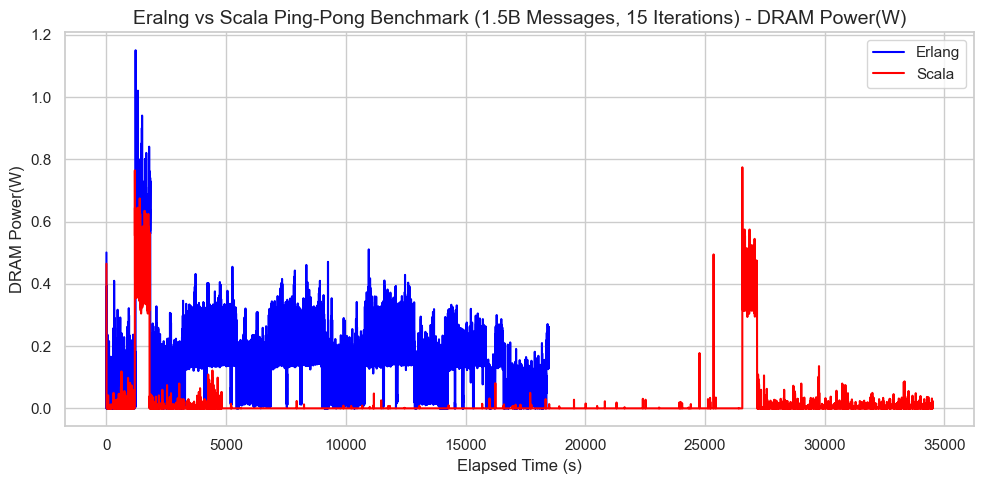

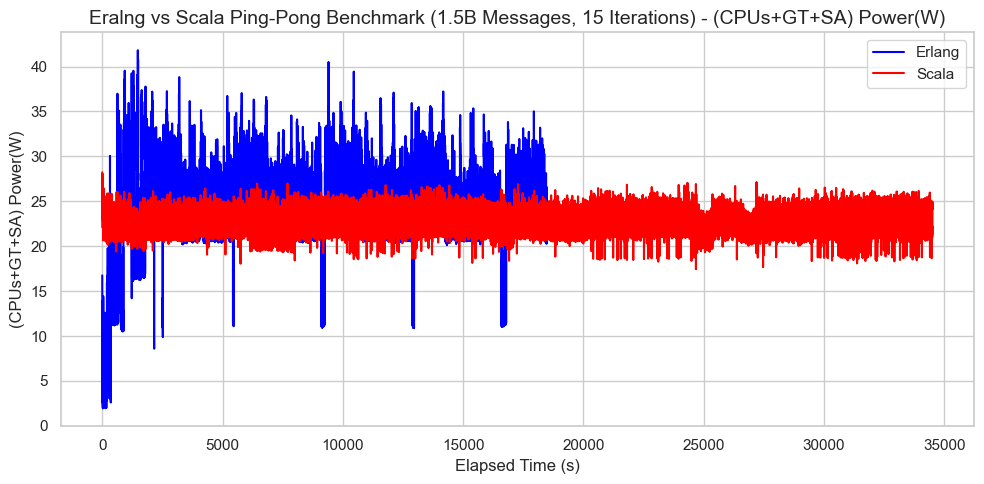

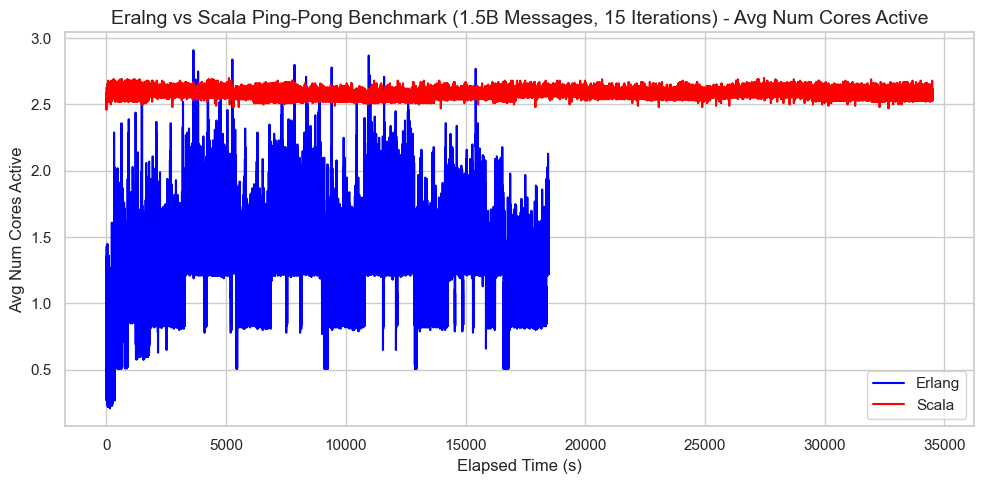

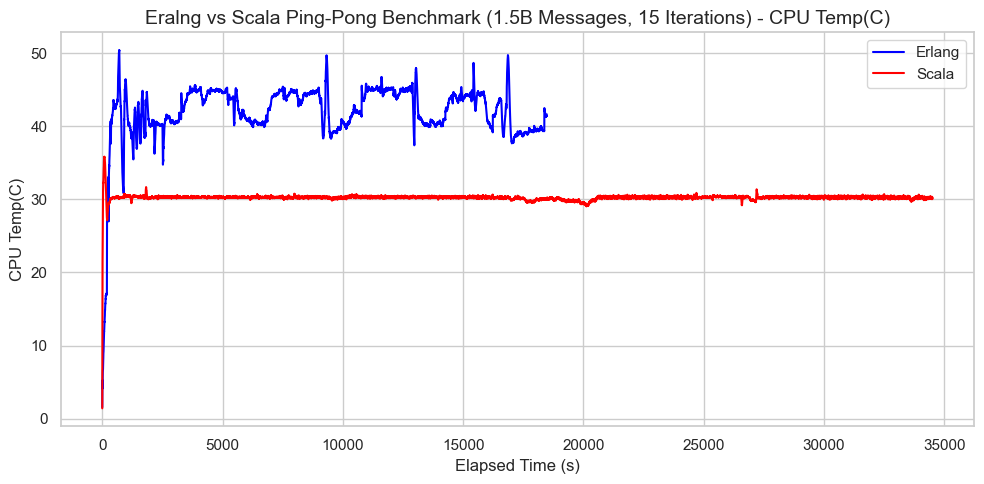

In [20]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Ping-Pong Benchmark {title_config_prefix}")


Compute Average Metrics

In [26]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [27]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        21.430802
GT Power(W)              -0.045406
DRAM Power(W)            -0.118530
(CPUs+GT+SA) Power(W)    22.526833
CPU Temp(C)              30.238708
Avg Num Cores Active      2.566564
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        16.497128
GT Power(W)               4.706126
DRAM Power(W)             0.103271
(CPUs+GT+SA) Power(W)    23.550693
CPU Temp(C)              42.043613
Avg Num Cores Active      1.201604
dtype: float64


Compute Total Energy Consumption

In [28]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Number of Messages": NMSG,
    "Iterations": ITERATIONS,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["Number of Messages"] == NMSG) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for Number of Messages =", NMSG, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/ping_pong/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 777410.6943824957 Joules
Erlang Benchmark: 435194.1951424119 Joules
